<div style="border:solid black 2px; padding: 20px">
    
**Final Project Number _One_**    
    
</div> 

<div style="border:solid black 2px; padding: 20px">
<div style="border:solid gray 5px; padding: 20px" class="alert alert-warning">

# An International Online Store Analytical Project by Using The A/B Testing - by awrb
    
</div> 

# Table of Contents: <a id='tableofcontents'></a>

    - 1. Introduction
        - 1.1 Goal
        - 1.2 Stages
    - 2. Data Pre-processing
        - 2.1 Transforming the DataFrames and Converting The Data Types
        - 2.2 Data Overview Elaboration
        - 2.3 Ensuring the Data Quality
        - 2.4 Removing One of The 'ab_test' Types
        - 2.5 Ensuring Data Anomalies
        - 2.6 Ensuring for Data Type, Array Form, Missing Values, and Duplicate Data
        - 2.7 Correcting The Missing Values and Duplicate Data
            - 2.7.1 Missing Values
    - 3. Explorative Data Analysis (EDA)
        - 3.1 Learning Conversion at Different Funnel Stages
        - 3.2 Learning Whether The Number of Events Per User Distributed Equally in The Samples
        - 3.3 Learning Whether The Users who Enter Both Samples
        - 3.4 Learning How Is The Number of Events Distributed by Days
        - 3.5 Learning The Possible Details in The Data that We have to take into Account before starting The A/B Test
    - 4. Evaluation The A/B Test Results
        - 4.1 By Using The Significance Level / "Alpha" Value = 0.01
        - 4.2 By Using The Significance Level / "Alpha" Value = 0.05
    - 5. Presentation
    - 6. General Conclusions and Recommendations

## Introduction

        We have received an analytical task from an international online store. Our predecessor failed to complete the project: the report is they launched an A/B test and then quit. Based on the information we have received, they start watermelon farm in Brazil. And what do we get is the technical specifications and the test results cause they left only both things.

### Goal

        As previously clarified above, that our predecessor failed to complete the analytical project, and their endeavor stopped at launched an A/B test and then quit cause starting watermelon farm in Brazil. Fortunately, they left several things, those are the technical specifications and the test results. Therefore, the technical description that we could obtain are:
        
    - The Test Name: recommender_system_test
    - Groups: А (control), B (new payment funnel)
    - Launch date: 2020-12-07
    - The date when they stopped taking up new users: 2020-12-21
    - End date: 2021-01-01
    - The Audience: 15% of the new users from the EU region
    - The Purpose of The Test: testing changes related to the introduction of an improved recommendation system
    - The Expected Result: within 14 days of signing up, users will show better conversion into product page views (the product_page event), product card views (product_card) and purchases (purchase). At each of the stage of the funnel product_page → product_card → purchase, there will be at least a 10% increase.
    - The Expected Number of Test Participants: 6000

        In a nutshell, we have already a short overview which we could make materials and directions or instructions to continue this project.

### Stages

        There are several steps to complete this project, namely:

    Step 1. Downloading and Loading The Data
    Step 2. Performing Several Focus Things to be Analyzed
    Step 3. Evaluating The A/B Test Results of The Project
    Step 4. Presenting My Project to The Clients
    Step 5. Formulating General Conclusions and Recommendations for Working with Clients
   
        which is divided into the following detailed stages:

    1. Data Pre-processing
    2. Explorative Data Analysis (EDA)
    3. Evaluation The A/B Test Results
    4. Presentation
    5. General Conclusions and Recommendations

        With the following description:

    1. Data Pre-processing (Step 1. Downloading and Loading The Data)
    - In this stage, we will load and read datasets from the following file path:
    
    1) '/datasets/ab_project_marketing_events_us.csv'   — the calendar of marketing events for 2020
    2) '/datasets/final_ab_new_users_upd_us.csv'        — all users who signed up in the online store from December 7 to 21, 2020
    3) '/datasets/final_ab_events_upd_us.csv'           — all events of the new users within the period from December 7, 2020 to January 1, 2021
    4) '/datasets/final_ab_participants_upd_us.csv'     — table containing test participants
    
    Here are the data descriptions of the files path above:

    1) '/datasets/ab_project_marketing_events_us.csv' structures contain:
    - name — the name of the marketing event
    - regions — regions where the ad campaign will be held
    - start_dt — campaign start date
    - finish_dt — campaign end date
    
    2) '/datasets/final_ab_new_users_upd_us.csv' structures contain:
    - user_id
    - first_date — sign-up date
    - region
    - device — device used to sign up
    
    3) '/datasets/final_ab_events_upd_us.csv' structures contain:
    - user_id
    - event_dt — event date and time
    - event_name — event type name
    - details — additional data on the event (for instance, the order total in USD for 'purchase' events)
    
    4) '/datasets/final_ab_participants_upd_us.csv' structures contain:
    - user_id
    - ab_test — test name
    - group — the test group the user belonged to
    
    
    2. Explorative Data Analysis (EDA) (Step 2. Performing Several Focus Things to be Analyzed)
    - In this stage, there are several things that need to be our focus, namely:
        a. Learning Conversion at Different Funnel Stages
        b. Learning Whether The Number of Events Per User Distributed Equally in The Samples
        c. Learning Whether The Users who Enter Both Samples
        d. Learning How Is The Number of Events Distributed by Days
        e. Learning The Possible Details in The Data that We have to take into Account before starting The A/B Test
    
    
    3. Evaluation The A/B Test Results (Step 3. Evaluating The A/B Test Results of The Project)
    - In this stage, we will evaluate the A/B test results with a few things to focus on:
        a. Several Things that We Get about The A/B Test Results
        b. The Use of Z-Criterion to Check The Statistical Difference between The Proportions

    For our some experiments:
    - By Using The Significance Level / "Alpha" Value = 0.01
    - By Using The Significance Level / "Alpha" Value = 0.05
    
    
    4. Presentation
    - In this stage, I will present My Project to The Clients.
    
    5. General Conclusions and Recommendations (Step 4. Formulating General Conclusions and Recommendations for Working with Clients)
    - In this stage, we will draw the conclusions and formulate the recommendations.

[Back to Contents](#tableofcontents)

# A/B Testing Analysis of An International Online Store 

## Data Pre-processing
    - Step 1. Downloading and Loading The Data

<div style="border:solid black 2px; padding: 20px">    
    
    First of all, we are going to load the required libraries, 'pandas', 'numpy', 'matplotlib.pyplot', 'seaborn', 'graph_objects', 'stats', 'math', 'warnings', as follows:
    
</div>  

In [563]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from plotly import graph_objects as go
from scipy import stats
import math

import warnings
warnings.filterwarnings('ignore')

    Now, we will load the data files into DataFrames and we are going to optimize the data for analysis purposes which object column type converts to category, as follows:

[Back to Contents](#tableofcontents)

### Transforming the DataFrames and Converting The Data Types

In [565]:
events_marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
upd_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv', parse_dates=['first_date'])
upd_events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
upd_participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')

    Now, we are going to take a look for the datas. These are the datas:

In [566]:
events_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [567]:
upd_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [568]:
upd_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [569]:
upd_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


    Findings:
    - We have four datasets, namely 'events_marketing', 'upd_users', 'upd_events', and 'upd_participants'.

    For 'events_marketing' dataset:
    - The dataset amounted 14 rows and 4 columns.
    - With data detailed, dtypes: object(4).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 576.0+ bytes.
    - In addition, for the dataset structures contain of the name of the marketing event, the regions where the ad campaign will be held, campaign start date, and campaign end date.

    For 'upd_users' dataset:
    - The dataset amounted 58703 rows and 4 columns.
    - With data detailed, dtypes: datetime64[ns](1), object(3).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 1.8+ MB.
    - In addition, for the dataset structures contain of customers profile of user_id, sign-up date, region, and device used to sign up.

    For 'upd_events' dataset:
    - The dataset amounted 423761 rows and 4 columns.
    - With data detailed, dtypes: float64(1), object(3).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 12.9+ MB.
    - In addition, for the dataset structures contain of user_id, event date and time, event type name, and the additional data on the event (for instance, the order total in USD for purchase events).
    
    For 'upd_participants' dataset:
    - The dataset amounted 14525 rows and 3 columns.
    - With data detailed, dtypes: object(3).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 340.6+ KB.
    - In addition, for the dataset structures contain of the list of the test group the user belonged to, those are user_id, test name, and the test group the user belonged to its self.

[Back to Contents](#tableofcontents)

### Data Overview Elaboration

    In this session, we will do the data overview elaboration by using some functions of 'columns', '.info()', '.head()', and '.describe()' in each datas for checking the datas, as follows:

    For 'events_marketing' dataset:

In [570]:
events_marketing.columns

Index(['name', 'regions', 'start_dt', 'finish_dt'], dtype='object')

In [571]:
events_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


In [572]:
events_marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [573]:
events_marketing.describe()

,name,regions,start_dt,finish_dt
count,14,14,14,14
unique,14,6,14,14
top,Victory Day CIS (May 9th) Event,APAC,2020-12-25,2020-03-10
freq,1,4,1,1


    For 'upd_users' dataset:

In [574]:
upd_users.columns

Index(['user_id', 'first_date', 'region', 'device'], dtype='object')

In [576]:
upd_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


In [577]:
upd_users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [578]:
upd_users.describe()

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,2D96107E54C97805,2020-12-21 00:00:00,EU,Android
freq,1,6077,43396,26159
first,NaN,2020-12-07 00:00:00,NaN,NaN
last,NaN,2020-12-23 00:00:00,NaN,NaN


    For 'upd_events' dataset:

In [579]:
upd_events.columns

Index(['user_id', 'event_dt', 'event_name', 'details'], dtype='object')

In [580]:
upd_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [581]:
upd_events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [582]:
upd_events.describe()

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


    For 'upd_participants' dataset:
    - For additional, we will use 'tail()' function in 'upd_participants' as well.

In [583]:
upd_participants.columns

Index(['user_id', 'group', 'ab_test'], dtype='object')

In [584]:
upd_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


In [585]:
upd_participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [586]:
upd_participants.tail()

,user_id,group,ab_test
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test
14524,79F9ABFB029CF724,B,interface_eu_test


In [587]:
upd_participants.describe()

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,C176364EF5C025EA,A,interface_eu_test
freq,2,8214,10850


    Findings:
    
    - In the results above, we find that these data are in the form of object(4) from 'events_marketing' dataset, datetime64[ns](1), object(3) from 'upd_users' dataset, float64(1), object(3) from 'upd_events' dataset, and object(3) from 'upd_participants' dataset.
    - In the result of '.head()' function, four datasets display that all of this datas are 'variant' in the form of string and numbers. The numbers form are consisting of integers, decimal numbers, datetime, also sometimes mixed with letters.

[Back to Contents](#tableofcontents)

### Ensuring the Data Quality

    In this session, we will ensure the Data Quality for 'events_marketing', 'upd_users', 'upd_events', and 'upd_participants' dataset, as follows:

    For 'events_marketing' dataset:

    First, we are going to ensure the data quality of the 'name' column, as follows:

In [588]:
events_marketing['name'].value_counts()

Victory Day CIS (May 9th) Event     1
Black Friday Ads Campaign           1
Chinese New Year Promo              1
4th of July Promo                   1
St. Valentine's Day Giveaway        1
CIS New Year Gift Lottery           1
International Women's Day Promo     1
Christmas&New Year Promo            1
St. Patric's Day Promo              1
Dragon Boat Festival Giveaway       1
Easter Promo                        1
Chinese Moon Festival               1
Single's Day Gift Promo             1
Labor day (May 1st) Ads Campaign    1
Name: name, dtype: int64

    Second, we are going to ensure the data quality of the 'regions' column, as follows:

In [589]:
events_marketing['regions'].value_counts()

APAC                        4
EU, CIS, APAC, N.America    3
EU, CIS, APAC               2
CIS                         2
EU, N.America               2
N.America                   1
Name: regions, dtype: int64

    Third, we are going to ensure the data quality of the 'start_dt' column, as follows:

In [590]:
events_marketing['start_dt'].value_counts()

2020-12-25    1
2020-05-01    1
2020-11-11    1
2020-02-14    1
2020-05-09    1
2020-01-25    1
2020-12-30    1
2020-04-12    1
2020-03-17    1
2020-11-26    1
2020-06-25    1
2020-10-01    1
2020-03-08    1
2020-07-04    1
Name: start_dt, dtype: int64

    Fourth, we are going to ensure the data quality of the 'finish_dt' column, as follows:

In [591]:
events_marketing['finish_dt'].value_counts()

2020-03-10    1
2020-05-11    1
2020-02-07    1
2020-03-19    1
2020-10-07    1
2020-07-01    1
2020-05-03    1
2020-02-16    1
2020-11-12    1
2021-01-03    1
2020-07-11    1
2020-04-19    1
2021-01-07    1
2020-12-01    1
Name: finish_dt, dtype: int64

[Back to Contents](#tableofcontents)

    For 'upd_users' dataset:

    First, we are going to ensure the data quality of the 'user_id' column, as follows:

In [592]:
upd_users['user_id'].value_counts()

2D96107E54C97805    1
AB22652B06780351    1
BD2EF8DD4FC09ECD    1
6E35C74A1FC5CA9B    1
0E828FD81D602B5F    1
                   ..
E3EFDD37947AA52C    1
68329861756581A3    1
93E52F9B8F49F10A    1
6A1BD777F7B4D958    1
E0C4CD42FBB50D5C    1
Name: user_id, Length: 58703, dtype: int64

    Second, we are going to ensure the data quality of the 'first_date' column, as follows:

In [593]:
upd_users['first_date'].value_counts()

2020-12-21    6077
2020-12-14    5448
2020-12-07    5291
2020-12-13    4181
2020-12-20    4140
2020-12-12    3591
2020-12-19    3480
2020-12-18    3238
2020-12-22    3083
2020-12-08    3017
2020-12-17    2940
2020-12-15    2924
2020-12-10    2784
2020-12-11    2226
2020-12-23    2180
2020-12-16    2093
2020-12-09    2010
Name: first_date, dtype: int64

    Third, we are going to ensure the data quality of the 'region' column, as follows:

In [594]:
upd_users['region'].value_counts()

EU           43396
N.America     9051
CIS           3130
APAC          3126
Name: region, dtype: int64

    Fourth, we are going to ensure the data quality of the 'device' column, as follows:

In [595]:
upd_users['device'].value_counts()

Android    26159
PC         14845
iPhone     11902
Mac         5797
Name: device, dtype: int64

    Temporary Findings:
    - After we ensure for 'upd_users' dataset, we find that there are users who sign up on the dates of 21-23 December 2020 while for this testing, the date company stopped taking up new users is 2020-12-21. Therefore, in the EDA stage, we will pull out them after merge all DataFrames into a DataFrame.

[Back to Contents](#tableofcontents)

    For 'upd_events' dataset:

    First, we are going to ensure the data quality of the 'user_id' column, as follows:

In [596]:
upd_events['user_id'].value_counts()

A3917F81482141F2    36
11285A53EC2B2042    32
426330B820B8711A    32
203773F2A53233A8    32
BA87FD8D70D63CC6    32
                    ..
2C7FEE67C695C917     1
C080A63FE13731F2     1
923BE026798BEA41     1
7BDABCEAA9019C0A     1
DE62057CDAF5B1A6     1
Name: user_id, Length: 58703, dtype: int64

    Second, we are going to ensure the data quality of the 'event_dt' column, as follows:

In [597]:
upd_events['event_dt'].value_counts()

2020-12-23 02:37:24    10
2020-12-14 18:54:55    10
2020-12-24 00:54:52     9
2020-12-20 02:51:18     9
2020-12-13 06:00:54     9
                       ..
2020-12-16 14:27:34     1
2020-12-24 13:25:03     1
2020-12-07 16:09:09     1
2020-12-09 21:28:49     1
2020-12-17 11:57:20     1
Name: event_dt, Length: 257138, dtype: int64

    Third, we are going to ensure the data quality of the 'event_name' column, as follows:

In [598]:
upd_events['event_name'].value_counts()

login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: event_name, dtype: int64

    Fourth, we are going to ensure the data quality of the 'details' column, as follows:

In [599]:
upd_events['details'].value_counts()

4.99      44579
9.99       9158
99.99      5405
499.99     1172
Name: details, dtype: int64

[Back to Contents](#tableofcontents)

    For 'upd_participants' dataset:

In [600]:
upd_participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


    First, we are going to ensure the data quality of the 'user_id' column, as follows:

In [601]:
upd_participants['user_id'].value_counts()

C176364EF5C025EA    2
055A4CD17A483B8E    2
697F116B31D05FCF    2
BD5317D49443EA5E    2
0DD2E54D87CFD4A4    2
                   ..
C18F8E6B295095EE    1
43BA33CDED9F1870    1
3BEEA4EF95E9296A    1
7059DFDF8025FD86    1
362ECAB1F601F687    1
Name: user_id, Length: 13638, dtype: int64

    Second, we are going to ensure the data quality of the 'group' column, as follows:

In [602]:
upd_participants['group'].value_counts()

A    8214
B    6311
Name: group, dtype: int64

    Third, we are going to ensure the data quality of the 'ab_test' column, as follows:

In [603]:
upd_participants['ab_test'].value_counts()

interface_eu_test          10850
recommender_system_test     3675
Name: ab_test, dtype: int64

    Findings:
    
    - We have checked the Data Quality of dataset columns.
    - As we could see on the 'group' column above, consist of:
        a. Group A: 8214 participants (control group)
        b. Group B: 6311 participants (new payment funnel group) => which surpass our expected number of test participants: that is stated 6000 at technical description.
    
    - From ensuring the data quality of the 'ab_test' column above, there are two type of 'ab_test', those are 'interface_eu_test' and 'recommender_system_test'. Cause of our purpose of this A/B testing analysis is for 'recommender_system_test' experiment (as stated at the technical description from our predecessor). Hence, we will remove the 'interface_eu_test' in the next session.

[Back to Contents](#tableofcontents)

### Removing One of The 'ab_test' Types
    - Removing the 'interface_eu_test' type of 'ab_test' from 'upd_participants' dataset.

    In this case, we will remove the 'interface_eu_test' from 'upd_participants' dataset and save into new table, as follows:

In [604]:
upd_participants_remover = upd_participants.loc[upd_participants['ab_test'] == 'recommender_system_test']
upd_participants_remover

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
...,...,...,...
3670,053FB26D6D49EDDC,A,recommender_system_test
3671,9D263B8EF15CF188,B,recommender_system_test
3672,F2FBBA33F37DEC46,A,recommender_system_test
3673,29C92313A98B1176,B,recommender_system_test


    Now, we will ensure by checking 'upd_participants_remover' with '.head()' and '.tail()' function, as follows:

In [605]:
upd_participants_remover.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [606]:
upd_participants_remover.tail()

,user_id,group,ab_test
3670,053FB26D6D49EDDC,A,recommender_system_test
3671,9D263B8EF15CF188,B,recommender_system_test
3672,F2FBBA33F37DEC46,A,recommender_system_test
3673,29C92313A98B1176,B,recommender_system_test
3674,6715343AFBA285AE,B,recommender_system_test


    Findings:
    
    - We have removed the 'interface_eu_test' type of 'ab_test' from 'upd_participants' dataset. Now, we are going to focus on 'recommender_system_test' test name as stated by our predecessor at the technical description in advance.
    - We have ensured the 'upd_participants_remover' by using '.head()' and '.tail()' function and the result shows that 'ab_test' is almost 'recommender_system_test' and we could be sure that those are all in 'recommender_system_test' in this time.
    - As stated previously on technical description, the expected number of test participants is 6000. Nevertheless, in our data above, the 'recommender_system_test' test participants is only 3675 users.

[Back to Contents](#tableofcontents)

### Ensuring Data Anomalies

    In this session, we are going to ensure whether the datas contain anomalies data. We will examine do the 'event_dt' (customer's event date and time) less than 'first_date' (customer's sign-up date) or not or we might find something else from the datas.

    First, we will merge the 'upd_events' and 'upd_users' dataset to ensure anomalies data in the 'event_dt' column that not less than the 'first_date' column, as follows:

In [607]:
anomalies_merge_ensuring = upd_events.merge(right=upd_users, on='user_id', how='left')
anomalies_merge_ensuring

,user_id,event_dt,event_name,details,first_date,region,device
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android
...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN,2020-12-07,EU,Android
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN,2020-12-07,EU,PC
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN,2020-12-07,EU,Android
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN,2020-12-07,EU,iPhone


    Now, we are going to ensure the anomalies data in the 'anomalies_merge_ensuring' variable, as follows: 

In [608]:
(anomalies_merge_ensuring['event_dt'] > anomalies_merge_ensuring['first_date']).value_counts()

True    423761
dtype: int64

In [609]:
(anomalies_merge_ensuring['event_dt'] < anomalies_merge_ensuring['first_date']).value_counts()

False    423761
dtype: int64

    Findings:
    
    - From our ensuring, there are no anomalies data. The 'event_dt' column (customer's event date and time) as same as the 'first_date' column (customer's sign-up date). We have already ensure by using 'more than' (>) and 'less than (<) function.
    - The datas is already appropriate.

[Back to Contents](#tableofcontents)

### Ensuring for Data Type, Array Form, Missing Values, and Duplicate Data

    We will ensure the datas, as follows:

    1. For 'events_marketing' dataset:

    Ensuring the Data Type for 'events_marketing' dataset, as follows:

In [610]:
events_marketing.dtypes

name         object
regions      object
start_dt     object
finish_dt    object
dtype: object

    Ensuring the Array Form for 'events_marketing' dataset, as follows:

In [611]:
events_marketing.shape

(14, 4)

    Ensuring the Missing Values for 'events_marketing' dataset, as follows:

In [612]:
events_marketing.isna().sum()

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

    Finally, ensuring the Duplicate Data for 'events_marketing' dataset, as follows:

In [613]:
events_marketing.duplicated().sum()

0

[Back to Contents](#tableofcontents)

    2. For 'upd_users' dataset:

    Ensuring the Data Type for 'upd_users' dataset, as follows:

In [614]:
upd_users.dtypes

user_id               object
first_date    datetime64[ns]
region                object
device                object
dtype: object

    Ensuring the Array Form for 'upd_users' dataset, as follows:

In [615]:
upd_users.shape

(58703, 4)

    Ensuring the Missing Values for 'upd_users' dataset, as follows:

In [616]:
upd_users.isna().sum()

user_id       0
first_date    0
region        0
device        0
dtype: int64

    Finally, ensuring the Duplicate Data for 'upd_users' dataset, as follows:

In [617]:
upd_users.duplicated().sum()

0

[Back to Contents](#tableofcontents)

    3. For 'upd_events' dataset:

    Ensuring the Data Type for 'upd_events' dataset, as follows:

In [618]:
upd_events.dtypes

user_id        object
event_dt       object
event_name     object
details       float64
dtype: object

    Ensuring the Array Form for 'upd_events' dataset, as follows:

In [619]:
upd_events.shape

(423761, 4)

    Ensuring the Missing Values for 'upd_events' dataset, as follows:

In [620]:
upd_events.isna().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

    For additional, we will ensure the percentage of missing values in the 'upd_events' dataset, as follows:

In [621]:
((upd_events.isna().sum()) / len(upd_events) * 100).round()

user_id        0.0
event_dt       0.0
event_name     0.0
details       86.0
dtype: float64

    Afterwards, we ensure the 'details' column about the missing values from 'upd_events' dataset, as follows:

In [624]:
upd_events[upd_events['details'].isna()]

,user_id,event_dt,event_name,details
60314,2E1BF1D4C37EA01F,2020-12-07 09:05:47,product_cart,NaN
60315,50734A22C0C63768,2020-12-07 13:24:03,product_cart,NaN
60316,5EB159DA9DC94DBA,2020-12-07 22:54:02,product_cart,NaN
60317,084A22B980BA8169,2020-12-07 15:25:55,product_cart,NaN
60318,0FC21E6F8FAA8DEC,2020-12-07 06:56:27,product_cart,NaN
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


    Finally, ensuring the Duplicate Data for 'upd_events' dataset, as follows:

In [625]:
upd_events.duplicated().sum()

0

[Back to Contents](#tableofcontents)

    4. For 'upd_participants' dataset:

    Ensuring the Data Type for 'upd_participants' dataset, as follows:

In [627]:
upd_participants.dtypes

user_id    object
group      object
ab_test    object
dtype: object

    Ensuring the Array Form for 'upd_participants' dataset, as follows:

In [628]:
upd_participants.shape

(14525, 3)

    Ensuring the Missing Values for 'upd_participants' dataset, as follows:

In [629]:
upd_participants.isna().sum()

user_id    0
group      0
ab_test    0
dtype: int64

    Finally, ensuring the Duplicate Data for 'upd_participants' dataset, as follows:

In [630]:
upd_participants.duplicated().sum()

0

    Findings:
    
    - We have ensured for Data Type, Array Form, Missing Values, and Duplicate Data for four datasets.
    - The Data Type is already mentioned above, consist of object(4) from 'events_marketing' dataset, datetime64[ns](1), object(3) from 'upd_users' dataset, float64(1), object(3) from 'upd_events' dataset, and object(3) from 'upd_participants' dataset.
    
    - 1) The Array Form is (14, 4), that means 14 rows and 4 columns as well for 'events_marketing' dataset.
    - 2) The Array Form is (58703, 4), that means 58703 rows and 4 columns as well for 'upd_users' dataset.
    - 3) The Array Form is (423761, 4), that means 423761 rows and 4 columns as well for 'upd_events' dataset.
    - 4) The Array Form is (14525, 3), that means 14525 rows and 3 columns as well for 'upd_participants' dataset.

    - From our ensuring above, we found missing value at 'details' column from 'upd_events' dataset, those are 363447 rows (86.0% in the percentage of the whole 'upd_events' dataset).
    - We could see and predict that the 'details' column comprises the additional data on the event, i.e. it could be one the value of the order total for events purchases.
    - We found 'NaN' in the 'details' column which we could guess that it is on a par of there are no additional datas. Therefore, we could replace the values with the null values in the next session below.
    
    - There are no Duplicate Data on four datasets.

[Back to Contents](#tableofcontents)

### Correcting The Missing Values and Duplicate Data

    Now, we will correct the Missing Values in the 'upd_events' dataset.

#### Missing Values

    Anteriorly, we will calculate the missing values in the 'details' column from 'upd_events' dataset, as follows:

In [631]:
upd_events['details'].isna().sum()

363447

    Then, we replace the missing values in the 'details' column with null values (0) cause of our stated that there are no additional datas in advance, as follows:

In [633]:
upd_events['details'] = upd_events['details'].fillna(0)

     Checking the 'details' column to ensure if there are still missing values, as follows:

In [634]:
upd_events['details'].isna().sum()

0

In [635]:
upd_events.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
dtype: int64

    Now, we have corrected the missing value in the 'upd_events' dataset.

    Findings:
    
    - Beforehand, we found 363447 rows of Missing Values in the 'details' column from 'upd_events' dataset, that means 86.0% in the percentage calculation from the whole 'upd_events' dataset.
    - Now, we have done in removing all missing values. There are no missing value anymore.
    - The four datasets are ready to be analyzed and processed.

[Back to Contents](#tableofcontents)

## Explorative Data Analysis (EDA)
    - Step 2. Performing Several Focus Things to be Analyzed

<div style="border:solid black 2px; padding: 20px">    
    
    First of all in this stage, we are going to do some steps, those are:
    
    - Making straightforward analysis by merging the 'upd_users', 'upd_events', and 'upd_participants' datasets.
    - As we stated previously, we found users' sign up on the dates of 21-23 December 2020. Furthermore, we will pull out them because the date company stopped taking up new users is 2020-12-21.
    
</div>    

    Merging the 'upd_users' and 'upd_events' dataset based on 'user_id' column, as follows:

In [636]:
dataset1_merging = upd_events.merge(upd_users, on ='user_id', how='left')

    Merging the 'dataset1_merging' table and 'upd_participants' dataset based on 'user_id' column, as follows:

In [637]:
dataset1_merging = dataset1_merging.merge(upd_participants_remover, on ='user_id', how='left')
dataset1_merging

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,NaN,NaN
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN,NaN
...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-07,EU,Android,NaN,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-07,EU,PC,NaN,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-07,EU,Android,NaN,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-07,EU,iPhone,NaN,NaN


    Now, we ensure for duplicate data in the 'dataset1_merging' table, as follows:

In [638]:
dataset1_merging.duplicated().sum()

0

    Taking a look at the users' total who sign up on the dates of 21-23 December 2020, as follows:

In [639]:
dataset1_merging[dataset1_merging['first_date'] > "2020-12-20"]

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
38541,31FFA5EE2B84061B,2020-12-21 12:34:24,purchase,4.99,2020-12-21,EU,iPhone,NaN,NaN
38542,A0BDD78F3D0CF974,2020-12-21 08:17:25,purchase,99.99,2020-12-21,EU,iPhone,NaN,NaN
38543,7CF6CBB849F2ABA0,2020-12-21 16:29:15,purchase,9.99,2020-12-21,N.America,PC,NaN,NaN
38544,BB343C2CF94723A5,2020-12-21 16:18:51,purchase,9.99,2020-12-21,EU,PC,NaN,NaN
38545,EABF04D78A0863A9,2020-12-21 02:54:16,purchase,4.99,2020-12-21,N.America,PC,NaN,NaN
...,...,...,...,...,...,...,...,...,...
421857,A801F4F14C543707,2020-12-29 03:09:53,login,0.00,2020-12-23,N.America,PC,NaN,NaN
421858,69991E6AE74B5C8B,2020-12-29 19:10:53,login,0.00,2020-12-23,EU,iPhone,NaN,NaN
421859,DAEF8CF6E253DBCE,2020-12-29 22:46:23,login,0.00,2020-12-23,EU,Android,NaN,NaN
421860,32A46395A711AEFF,2020-12-29 07:51:45,login,0.00,2020-12-23,EU,iPhone,NaN,NaN


    Temporary Findings:
    - We found that there are 66552 rows with users' total who sign up on the dates of 21-23 December 2020. Furthermore, we will remove them all.

    Pulling out the users' total who sign up on the dates of 21-23 December 2020 because the company stopped taking up new users on 2020-12-21 for the testing, as follows:

In [640]:
dataset1_merging = dataset1_merging.query('first_date < "2020-12-21"')
dataset1_merging

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99,2020-12-07,N.America,iPhone,NaN,NaN
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99,2020-12-07,EU,iPhone,NaN,NaN
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99,2020-12-07,N.America,iPhone,NaN,NaN
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99,2020-12-07,EU,iPhone,NaN,NaN
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99,2020-12-07,EU,Android,NaN,NaN
...,...,...,...,...,...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,0.00,2020-12-07,EU,Android,NaN,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,0.00,2020-12-07,EU,PC,NaN,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,0.00,2020-12-07,EU,Android,NaN,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,0.00,2020-12-07,EU,iPhone,NaN,NaN


    We will ensure the missing values of 'dataset1_merging' table, as follows:

In [641]:
dataset1_merging.isna().sum()

user_id            0
event_dt           0
event_name         0
details            0
first_date         0
region             0
device             0
group         336277
ab_test       336277
dtype: int64

    We calculate the percentage of 'dataset1_merging' missing values to the whole data, as follows:

In [642]:
dataset1_merging.isna().sum() / len(dataset1_merging) * 100

user_id        0.000000
event_dt       0.000000
event_name     0.000000
details        0.000000
first_date     0.000000
region         0.000000
device         0.000000
group         94.140125
ab_test       94.140125
dtype: float64

    Temporary Findings:
    - After merging 'upd_users', 'upd_events', 'upd_participants' datasets and pull out the users' total who sign up on the dates of 21-23 December 2020, we could assume that many users still do not have a group whether in Group A or B. Consequently, they make missing values as much of 336277 rows or 94.14% in percentage of whole data in the 'ab_test' column group. Thus, we could not confirm which group they are in and we will remove them from this analysis for the solving.

[Back to Contents](#tableofcontents)

    We are going to remove the users who do not have a group, as follows:

In [643]:
dataset1_merging = dataset1_merging.loc[~dataset1_merging['group'].isna()]

    Ensuring the missing values after removing the users who do not have a group, as follows:

In [644]:
dataset1_merging.isna().sum()

user_id       0
event_dt      0
event_name    0
details       0
first_date    0
region        0
device        0
group         0
ab_test       0
dtype: int64

In [645]:
dataset1_merging

,user_id,event_dt,event_name,details,first_date,region,device,group,ab_test
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99,2020-12-07,EU,Android,A,recommender_system_test
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,4.99,2020-12-07,EU,PC,A,recommender_system_test
58,49EA242586C87836,2020-12-07 06:31:24,purchase,99.99,2020-12-07,EU,iPhone,B,recommender_system_test
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,4.99,2020-12-07,EU,PC,A,recommender_system_test
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,4.99,2020-12-07,EU,PC,B,recommender_system_test
...,...,...,...,...,...,...,...,...,...
423683,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,0.00,2020-12-20,EU,iPhone,A,recommender_system_test
423702,96BDD55846D1F7F6,2020-12-29 16:53:42,login,0.00,2020-12-20,EU,iPhone,A,recommender_system_test
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,0.00,2020-12-20,EU,Android,A,recommender_system_test
423725,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,0.00,2020-12-07,EU,Android,B,recommender_system_test


[Back to Contents](#tableofcontents)

<div style="border:solid black 2px; padding: 20px">
    
    In this stage, there are several things that need to be our focus, namely:
    
    a. Learning Conversion at Different Funnel Stages
    b. Learning Whether The Number of Events Per User Distributed Equally in The Samples
    c. Learning Whether The Users who Enter Both Samples
    d. Learning How Is The Number of Events Distributed by Days
    e. Learning The Possible Details in The Data that We have to take into Account before starting The A/B Test
    
</div>

### Learning Conversion at Different Funnel Stages
    - We will see what events are in the data and their frequency of occurrence

    First, we will calculate how many events in the data, as follows:

In [646]:
events_total_all = dataset1_merging.pivot_table(
    index='event_name', values='user_id', aggfunc='count').sort_values(by='user_id', ascending=False)
events_total_all

,user_id
event_name,
login,9506
product_page,5850
purchase,2789
product_cart,2787


    Findings:
    
    - We could predict that the funnel stream down as follows: 'login' => 'product_page' => 'purchase' => 'product_cart'.
    - From the table above, total events in purchase is higher than product_cart ('purchase' is 2789 and 'product_cart' is 2787) 
    - To get over it, the come up approach is Closed Funnel, so it could shows sequential stream down funnels in one period. The funnels are not counted if they do not start from the first page (in 'login' event).

[Back to Contents](#tableofcontents)

# Closed Funnel Approach
    We will do these several steps, those are:
    
    - Spliting each events into four new DataFrames.
    - Merging all DataFrames into a new DataFrame from the last funnel to the first funnel, based on 'user_id' and 'event_dt' column.
    - Calculating each events to get a Closed Funnel.

    We will drop the columns we do not need and save to the new table, as follows:

In [647]:
dataset1_merging_drop = dataset1_merging.drop(['first_date', 'details', 'region', 'device', 'ab_test'], axis=1)
dataset1_merging_drop

,user_id,event_dt,event_name,group
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,A
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,A
58,49EA242586C87836,2020-12-07 06:31:24,purchase,B
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,A
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,B
...,...,...,...,...
423683,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,A
423702,96BDD55846D1F7F6,2020-12-29 16:53:42,login,A
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,A
423725,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,B


    Ensuring the duplicate data in the new table of 'dataset1_merging_drop', as follows:

In [648]:
dataset1_merging_drop.duplicated().sum()

0

    Now, we are going to split each events into four new DataFrames, as follows:

In [649]:
upd_events_login = dataset1_merging_drop.loc[dataset1_merging_drop['event_name'] == 'login']
upd_events_product_page = dataset1_merging_drop.loc[dataset1_merging_drop['event_name'] == 'product_page']
upd_events_product_cart = dataset1_merging_drop.loc[dataset1_merging_drop['event_name'] == 'product_cart']
upd_events_purchase = dataset1_merging_drop.loc[dataset1_merging_drop['event_name'] == 'purchase']

    Then, renaming the 'event_name' column in each four new DataFrames, as follows:

In [650]:
upd_events_login = upd_events_login.rename(columns={'event_name': 'upd_events_login'})
upd_events_product_page = upd_events_product_page.rename(columns={'event_name': 'upd_events_product_page'})
upd_events_product_cart = upd_events_product_cart.rename(columns={'event_name': 'upd_events_product_cart'})
upd_events_purchase = upd_events_purchase.rename(columns={'event_name': 'upd_events_purchase'})

    Taking a look a new table of 'upd_events_login', as follows:

In [651]:
upd_events_login

,user_id,event_dt,upd_events_login,group
241296,D72A72121175D8BE,2020-12-07 21:52:07,login,A
241314,DD4352CDCF8C3D57,2020-12-07 15:32:53,login,B
241317,831887FE7F2D6CBA,2020-12-07 06:50:29,login,A
241333,4CB179C7F847320B,2020-12-07 01:37:05,login,B
241334,29C92313A98B1176,2020-12-07 06:18:24,login,B
...,...,...,...,...
423683,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,A
423702,96BDD55846D1F7F6,2020-12-29 16:53:42,login,A
423711,553BAE96C6EB6240,2020-12-29 14:09:14,login,A
423725,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,B


    Taking a look a new table of 'upd_events_product_page', as follows:

In [652]:
upd_events_product_page

,user_id,event_dt,upd_events_product_page,group
120434,D72A72121175D8BE,2020-12-07 21:52:10,product_page,A
120448,DD4352CDCF8C3D57,2020-12-07 15:32:54,product_page,B
120458,4CB179C7F847320B,2020-12-07 01:37:06,product_page,B
120459,29C92313A98B1176,2020-12-07 06:18:26,product_page,B
120463,7D1BFB181017EB46,2020-12-07 15:50:23,product_page,B
...,...,...,...,...
241216,36EDA624DB7B7F90,2020-12-29 20:54:26,product_page,A
241241,E5589EAE02ACD150,2020-12-29 22:17:10,product_page,A
241243,D21F0D4FDCD82DB2,2020-12-29 02:17:01,product_page,A
241257,96BDD55846D1F7F6,2020-12-29 16:53:42,product_page,A


    Taking a look a new table of 'upd_events_product_cart', as follows:

In [653]:
upd_events_product_cart

,user_id,event_dt,upd_events_product_cart,group
60320,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,A
60327,7D1BFB181017EB46,2020-12-07 15:50:23,product_cart,B
60354,204343649F72D01B,2020-12-07 02:20:57,product_cart,B
60358,23B71FAAF4A89964,2020-12-07 20:47:10,product_cart,A
60363,75845C83258FBF73,2020-12-07 20:20:21,product_cart,B
...,...,...,...,...
120174,9429C337BF221E89,2020-12-29 17:30:14,product_cart,A
120195,16755E4546D18F76,2020-12-29 01:22:56,product_cart,A
120200,AE7BFC03E442CCC9,2020-12-29 07:10:24,product_cart,A
120375,EDD72A37B86EE7C2,2020-12-29 02:22:45,product_cart,A


    Taking a look a new table of 'upd_events_purchase', as follows:

In [654]:
upd_events_purchase

,user_id,event_dt,upd_events_purchase,group
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,A
17,3C5DD0288AC4FE23,2020-12-07 19:42:40,purchase,A
58,49EA242586C87836,2020-12-07 06:31:24,purchase,B
71,2B06EB547B7AAD08,2020-12-07 21:36:38,purchase,A
74,A640F31CAC7823A6,2020-12-07 18:48:26,purchase,B
...,...,...,...,...
60214,D6479D2D2511094C,2020-12-29 12:28:35,purchase,A
60228,307C06C0E6F09B93,2020-12-29 14:36:46,purchase,A
60244,1EAEC9948792FF2F,2020-12-29 03:59:59,purchase,A
60246,68E46B7897232BBF,2020-12-29 07:51:25,purchase,A


    Temporary Findings:
    At this moment, we have four new DataFrames, those are:
    1. 'upd_events_login'
    2. 'upd_events_product_page'
    3. 'upd_events_product_cart'
    4. 'upd_events_purchase'

[Back to Contents](#tableofcontents)

    We are going to merge each table to new table. Now, we merge the 'upd_events_login' table with 'upd_events_product_page' by left join, as follows:

In [655]:
login_tothe_page = upd_events_login.merge(upd_events_product_page, on=['user_id', 'event_dt'], how='left')
login_tothe_page

,user_id,event_dt,upd_events_login,group_x,upd_events_product_page,group_y
0,D72A72121175D8BE,2020-12-07 21:52:07,login,A,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,login,B,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,login,A,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,login,B,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,login,B,NaN,NaN
...,...,...,...,...,...,...
9501,D21F0D4FDCD82DB2,2020-12-29 02:17:00,login,A,NaN,NaN
9502,96BDD55846D1F7F6,2020-12-29 16:53:42,login,A,product_page,A
9503,553BAE96C6EB6240,2020-12-29 14:09:14,login,A,NaN,NaN
9504,DD4352CDCF8C3D57,2020-12-30 12:42:56,login,B,NaN,NaN


    After that, we merge the 'upd_events_product_page' table with 'upd_events_product_cart' table by left join, as follows:

In [656]:
tothe_page_cart = upd_events_product_page.merge(upd_events_product_cart, on=['user_id', 'event_dt'], how='left')
tothe_page_cart

,user_id,event_dt,upd_events_product_page,group_x,upd_events_product_cart,group_y
0,D72A72121175D8BE,2020-12-07 21:52:10,product_page,A,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:54,product_page,B,NaN,NaN
2,4CB179C7F847320B,2020-12-07 01:37:06,product_page,B,NaN,NaN
3,29C92313A98B1176,2020-12-07 06:18:26,product_page,B,NaN,NaN
4,7D1BFB181017EB46,2020-12-07 15:50:23,product_page,B,product_cart,B
...,...,...,...,...,...,...
5845,36EDA624DB7B7F90,2020-12-29 20:54:26,product_page,A,NaN,NaN
5846,E5589EAE02ACD150,2020-12-29 22:17:10,product_page,A,NaN,NaN
5847,D21F0D4FDCD82DB2,2020-12-29 02:17:01,product_page,A,NaN,NaN
5848,96BDD55846D1F7F6,2020-12-29 16:53:42,product_page,A,NaN,NaN


    Then, we merge the 'upd_events_product_cart' table with 'upd_events_purchase' table by left join, as follows:

In [657]:
cart_tothe_purchase = upd_events_product_cart.merge(upd_events_purchase, on=['user_id', 'event_dt'], how='left')
cart_tothe_purchase

,user_id,event_dt,upd_events_product_cart,group_x,upd_events_purchase,group_y
0,831887FE7F2D6CBA,2020-12-07 06:50:30,product_cart,A,NaN,NaN
1,7D1BFB181017EB46,2020-12-07 15:50:23,product_cart,B,NaN,NaN
2,204343649F72D01B,2020-12-07 02:20:57,product_cart,B,NaN,NaN
3,23B71FAAF4A89964,2020-12-07 20:47:10,product_cart,A,NaN,NaN
4,75845C83258FBF73,2020-12-07 20:20:21,product_cart,B,NaN,NaN
...,...,...,...,...,...,...
2782,9429C337BF221E89,2020-12-29 17:30:14,product_cart,A,NaN,NaN
2783,16755E4546D18F76,2020-12-29 01:22:56,product_cart,A,NaN,NaN
2784,AE7BFC03E442CCC9,2020-12-29 07:10:24,product_cart,A,NaN,NaN
2785,EDD72A37B86EE7C2,2020-12-29 02:22:45,product_cart,A,NaN,NaN


    Finally, we merge all of the tables above, as follows:

In [658]:
closed_funnel_approach = login_tothe_page.merge(tothe_page_cart, on=['user_id', 'event_dt'], how='left')\
                .merge(cart_tothe_purchase, on=['user_id', 'event_dt'], how='left')

closed_funnel_approach.drop(['group_x', 'group_y_x', 'group_x_y', 'group_y_y', 'group_y', 'upd_events_product_page_y', 
                    'upd_events_product_cart_y'], axis=1, inplace=True)

closed_funnel_approach = closed_funnel_approach.rename(columns={'upd_events_product_page_x': 'upd_events_product_page',
                                              'upd_events_product_cart_x': 'upd_events_product_cart', 
                                              'group_x_x': 'group'})

closed_funnel_approach = closed_funnel_approach[['user_id', 'event_dt', 'group', 'upd_events_login',  'upd_events_product_page',
       'upd_events_product_cart', 'upd_events_purchase']]
closed_funnel_approach

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9501,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9502,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9503,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9504,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


    Temporary Findings:
    - We have already merged each table to new table.

[Back to Contents](#tableofcontents)

# Total Events of Funnel

    First, we will calculate how many events in the data, as follows:

In [659]:
closed_funnel_computingall = closed_funnel_approach.pivot_table(index='user_id',
                                                   values=['upd_events_login', 'upd_events_product_page', 'upd_events_product_cart',
                                                           'upd_events_purchase'], 
                                                   aggfunc='count').reset_index()

closed_funnel_computingall = closed_funnel_computingall[['user_id', 'upd_events_login', 'upd_events_product_page', 'upd_events_product_cart',
                                                 'upd_events_purchase']]

closed_funnel_computingall.loc['total'] = closed_funnel_computingall.sum()
closed_funnel_computingall

,user_id,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,001064FEAAB631A1,3,0,0,0
1,0010A1C096941592,4,1,0,0
2,003DF44D7589BBD4,5,4,1,0
3,00505E15A9D81546,5,0,0,0
4,006E3E4E232CE760,3,1,0,0
...,...,...,...,...,...
3160,FF4456FBA59116E3,4,1,0,0
3161,FF825C1D791989B5,4,0,0,0
3162,FFAE9489C76F352B,3,0,0,0
3163,FFF28D02B1EACBE1,3,0,0,0


    We will calculate how many events in the data after executing, as follows:

In [660]:
mixall_events_agg = closed_funnel_computingall.loc['total']
mixall_events_agg = mixall_events_agg.to_frame()
mixall_events_agg.reset_index(inplace=True) 
mixall_events_agg = mixall_events_agg.rename(columns={'index': 'event_name'})
mixall_events_agg = mixall_events_agg.drop([0]).reset_index(drop=True)
mixall_events_agg

,event_name,total
0,upd_events_login,9506
1,upd_events_product_page,2524
2,upd_events_product_cart,429
3,upd_events_purchase,379


    Now, we will make the visualization, as follows:

In [661]:
mixall_events_agg_graph = mixall_events_agg.reset_index()
fig = go.Figure(go.Funnel(
    y = mixall_events_agg_graph['event_name'],
    x = mixall_events_agg_graph['total']
    ))
fig.show()

    Temporary Findings:
    - By using Closed Funnel approach, we could notice that from 9506 events of 'login', only 2524 that continue to the 'product_page' ('upd_events_product_page'), 429 events continue to the 'product_cart' ('upd_events_product_cart') and 379 events completed until the 'purchase' ('upd_events_purchase') stage.

[Back to Contents](#tableofcontents)

# Total Users of Funnel

    We will check 'closed_funnel_approach' table, as follows:

In [662]:
closed_funnel_approach

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9501,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9502,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9503,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9504,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


    Calculating each event by 'user_id' and saving to a new table, as follows:

In [663]:
closed_funnel_approach_nunique = closed_funnel_approach.pivot_table(index='user_id', values=['upd_events_login', 'upd_events_product_page', 
                                                                           'upd_events_product_cart', 'upd_events_purchase'], 
                                                  aggfunc='nunique').reset_index()

closed_funnel_approach_nunique = closed_funnel_approach_nunique[['user_id', 'upd_events_login', 'upd_events_product_page', 'upd_events_product_cart', 
                                               'upd_events_purchase']]

closed_funnel_approach_nunique.loc['total'] = closed_funnel_approach_nunique.sum()

closed_funnel_approach_nunique

,user_id,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,001064FEAAB631A1,1,0,0,0
1,0010A1C096941592,1,1,0,0
2,003DF44D7589BBD4,1,1,1,0
3,00505E15A9D81546,1,0,0,0
4,006E3E4E232CE760,1,1,0,0
...,...,...,...,...,...
3160,FF4456FBA59116E3,1,1,0,0
3161,FF825C1D791989B5,1,0,0,0
3162,FFAE9489C76F352B,1,0,0,0
3163,FFF28D02B1EACBE1,1,0,0,0


    Calculating how many users are in each event, as follows:

In [664]:
mixall_users_agg = closed_funnel_approach_nunique.loc['total']
mixall_users_agg = mixall_users_agg.to_frame()
mixall_users_agg.reset_index(inplace=True) 
mixall_users_agg = mixall_users_agg.rename(columns={'index': 'event_name'})
mixall_users_agg = mixall_users_agg.drop([0]).reset_index(drop=True)
mixall_users_agg

,event_name,total
0,upd_events_login,3164
1,upd_events_product_page,1521
2,upd_events_product_cart,325
3,upd_events_purchase,231


    Now, we will make the visualization, as follows:

In [665]:
mixall_users_agg_graph = mixall_users_agg.reset_index()
fig = go.Figure(go.Funnel(
    y = mixall_users_agg_graph['event_name'],
    x = mixall_users_agg_graph['total']
    ))
fig.show()

    Then, we calculate the percentage of users who make the entire journey from their first event to purchase, as follows:

In [666]:
percentage = ((mixall_users_agg.loc[3, 'total'] / mixall_users_agg.loc[0, 'total']) * 100)

print(f'The percentage of users who make the entire journey from the first event till checkout stage is \
{round(percentage, 2)}%')

The percentage of users who make the entire journey from the first event till checkout stage is 7.3%


    Findings:
    
    - We have 3164 users who has performed on event of 'login', with details as follows:

    a. 1521 users has performed on event of 'product_page' ('upd_events_product_page').
    b. 325 users has performed on event of 'product_cart' ('upd_events_product_cart').
    c. 231 users has performed on event of 'purchase' (upd_events_purchase').

    - The percentage of users who make the entire journey from the first event till checkout stage is 7.3% (3164 users versus 231 users).

[Back to Contents](#tableofcontents)

### Learning Whether The Number of Events Per User Distributed Equally in The Samples

    First, we will take a look at the 'closed_funnel_approach' table, as follows:

In [667]:
closed_funnel_approach

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9501,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9502,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9503,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9504,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


    Calculating each event by group and saving to a new table, as follows:

In [668]:
login_tothe_dist = (closed_funnel_approach.groupby(['group', 'upd_events_login']).nunique()['user_id']).to_frame()
tothe_page_dist = (closed_funnel_approach.groupby(['group', 'upd_events_product_page']).nunique()['user_id']).to_frame()
cart_tothe_dist = (closed_funnel_approach.groupby(['group', 'upd_events_product_cart']).nunique()['user_id']).to_frame()
the_purchase_dist = (closed_funnel_approach.groupby(['group', 'upd_events_purchase']).nunique()['user_id']).to_frame()

    Merging all of tables and calculating how many users are in each event, as follows:

In [669]:
user_per_group_dist = pd.merge(login_tothe_dist, tothe_page_dist, on='group', suffixes=['_a', '_b']).merge(
    cart_tothe_dist, on='group', suffixes=['_b', '_c']).merge(the_purchase_dist, on='group', suffixes=['_c', '_d'])

user_per_group_dist = user_per_group_dist.rename(columns={'user_id_a': 'log_user_alpha',
                                                          'user_id_b': 'page_user_alpha',
                                                          'user_id_c': 'cart_user_alpha',
                                                          'user_id_d': 'purch_user_alpha'})

user_per_group_dist.loc['total'] = user_per_group_dist.sum()
user_per_group_dist

,log_user_alpha,page_user_alpha,cart_user_alpha,purch_user_alpha
group,,,,
A,2330,1176,258,183
B,834,345,67,48
total,3164,1521,325,231


    Permuting the table, as follows:

In [670]:
user_per_group_dist = user_per_group_dist.T
user_per_group_dist = user_per_group_dist.rename(columns={'index': 'event_name'}) 
user_per_group_dist

group,A,B,total
log_user_alpha,2330,834,3164
page_user_alpha,1176,345,1521
cart_user_alpha,258,67,325
purch_user_alpha,183,48,231


    Calculating the percentage of the distribution, as follows:

In [671]:
user_per_group_dist['%A'] = user_per_group_dist['A'] / user_per_group_dist['total']
user_per_group_dist['%B'] = user_per_group_dist['B'] / user_per_group_dist['total']
user_per_group_dist

group,A,B,total,%A,%B
log_user_alpha,2330,834,3164,0.736410,0.263590
page_user_alpha,1176,345,1521,0.773176,0.226824
cart_user_alpha,258,67,325,0.793846,0.206154
purch_user_alpha,183,48,231,0.792208,0.207792


    Calculating the average of the distribution in each group, as follows:

In [672]:
user_per_group_dist['%A'].mean(), user_per_group_dist['%B'].mean()

(0.7739097741378205, 0.22609022586217958)

    Findings:
    
    - The distribution average of events per user is 77.3% in Group A and 22.6% in Group B which distributed prevalently in each event.

[Back to Contents](#tableofcontents)

### Learning Whether The Users who Enter Both Samples

    First, we will take a look at the table of 'closed_funnel_approach', as follows:

In [673]:
closed_funnel_approach

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9501,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9502,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9503,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9504,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


    Spliting data based on the group column, as follows:

In [675]:
group_a_yes = closed_funnel_approach.loc[closed_funnel_approach['group'] == 'A']
group_b_yes = closed_funnel_approach.loc[closed_funnel_approach['group'] == 'B']

    Now, we will see the 'group_a_yes' table and drop the columns that we do not need, as follows:

In [676]:
group_a_yes.drop(['event_dt', 'upd_events_login', 'upd_events_product_page', 'upd_events_product_cart', 'upd_events_purchase'
             ], axis=1, inplace=True)
group_a_yes

,user_id,group
0,D72A72121175D8BE,A
2,831887FE7F2D6CBA,A
6,3C5DD0288AC4FE23,A
7,B27F5380AF0936D3,A
9,ABABE1BAB6C77540,A
...,...,...
9499,36EDA624DB7B7F90,A
9500,E5589EAE02ACD150,A
9501,D21F0D4FDCD82DB2,A
9502,96BDD55846D1F7F6,A


    Taking a look of the 'group_b_yes' table and drop the columns that we do not need, as follows:

In [677]:
group_b_yes.drop(['event_dt', 'upd_events_login', 'upd_events_product_page', 'upd_events_product_cart', 'upd_events_purchase', 
              ], axis=1, inplace=True)
group_b_yes

,user_id,group
1,DD4352CDCF8C3D57,B
3,4CB179C7F847320B,B
4,29C92313A98B1176,B
5,7D1BFB181017EB46,B
8,21EA4E846C63EEA2,B
...,...,...
9483,2C041C5AE92FC133,B
9489,154228E9B2DA7F16,B
9491,2905EDBC782A9E69,B
9504,DD4352CDCF8C3D57,B


    Merging both tables of 'group_a_yes' and 'group_b_yes', as follows:

In [678]:
a_b_group_yes = group_a_yes.merge(group_b_yes, on='user_id', how='outer',  suffixes=['_a', '_b'])
a_b_group_yes

,user_id,group_a,group_b
0,D72A72121175D8BE,A,NaN
1,831887FE7F2D6CBA,A,NaN
2,831887FE7F2D6CBA,A,NaN
3,831887FE7F2D6CBA,A,NaN
4,3C5DD0288AC4FE23,A,NaN
...,...,...,...
9501,87C4963DF01E3B3C,NaN,B
9502,A09DFE27D4CFF8E8,NaN,B
9503,A09DFE27D4CFF8E8,NaN,B
9504,A09DFE27D4CFF8E8,NaN,B


    Ensuring for duplicate data, as follows:

In [679]:
a_b_group_yes.duplicated().sum()

6342

    Removing the duplicate data, as follows:

In [680]:
a_b_group_yes = a_b_group_yes.drop_duplicates().reset_index(drop=True)

    Ensuring datas after removing the duplicate data, as follows:

In [681]:
a_b_group_yes.duplicated().sum()

0

    We are going to see the description the 'a_b_group_yes' table, as follows:

In [682]:
a_b_group_yes.describe()

,user_id,group_a,group_b
count,3164,2330,834
unique,3164,1,1
top,3B3AE26404B64EF2,A,B
freq,1,2330,834


In [683]:
notes1 = [a_b_group_yes['group_a'].count()]
notes2 = [a_b_group_yes['group_b'].count()]
dict = {'A': notes1, 'B': notes2} 
    
total_user_per_group_oke = pd.DataFrame(dict)
total_user_per_group_oke = total_user_per_group_oke.T
total_user_per_group_oke = total_user_per_group_oke.rename(columns={0: 'total_users'})
total_user_per_group_oke

,total_users
A,2330
B,834


    Findings:
    
    - There are no dual users in either sample.
    - From the table result above, the total of Group A ('group_a') is 2330 users, and the total of Group B ('group_b') is 834 users. It is equal to 3164 users in 'user_id' column ('log_user_alpha' column).

[Back to Contents](#tableofcontents)

### Learning How Is The Number of Events Distributed by Days

    First, we will take a look at the 'closed_funnel_approach' table, as follows:

In [684]:
closed_funnel_approach

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,D72A72121175D8BE,2020-12-07 21:52:07,A,login,NaN,NaN,NaN
1,DD4352CDCF8C3D57,2020-12-07 15:32:53,B,login,NaN,NaN,NaN
2,831887FE7F2D6CBA,2020-12-07 06:50:29,A,login,NaN,NaN,NaN
3,4CB179C7F847320B,2020-12-07 01:37:05,B,login,NaN,NaN,NaN
4,29C92313A98B1176,2020-12-07 06:18:24,B,login,NaN,NaN,NaN
...,...,...,...,...,...,...,...
9501,D21F0D4FDCD82DB2,2020-12-29 02:17:00,A,login,NaN,NaN,NaN
9502,96BDD55846D1F7F6,2020-12-29 16:53:42,A,login,product_page,NaN,NaN
9503,553BAE96C6EB6240,2020-12-29 14:09:14,A,login,NaN,NaN,NaN
9504,DD4352CDCF8C3D57,2020-12-30 12:42:56,B,login,NaN,NaN,NaN


    In the initial, we are going to calculate the total events by date for the datas are still per user and per event in the 'closed_funnel_approach' table. Now, we calculate the total events by date and create it in a new table, as follows:

In [685]:
day_events_agg_new = closed_funnel_approach.groupby(['user_id', 'event_dt', 'group']).agg({'upd_events_login': 'nunique', 
                                                               'upd_events_product_page': 'nunique',
                                                               'upd_events_product_cart': 'nunique', 
                                                               'upd_events_purchase': 'nunique'
                                                              }).reset_index()

day_events_agg_new

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,001064FEAAB631A1,2020-12-20 14:43:27,B,1,0,0,0
1,001064FEAAB631A1,2020-12-21 03:19:15,B,1,0,0,0
2,001064FEAAB631A1,2020-12-26 15:55:17,B,1,0,0,0
3,0010A1C096941592,2020-12-17 21:07:27,A,1,1,0,0
4,0010A1C096941592,2020-12-19 04:34:37,A,1,0,0,0
...,...,...,...,...,...,...,...
9501,FFAE9489C76F352B,2020-12-15 20:14:51,A,1,0,0,0
9502,FFAE9489C76F352B,2020-12-19 11:32:50,A,1,0,0,0
9503,FFF28D02B1EACBE1,2020-12-16 08:24:56,B,1,0,0,0
9504,FFF28D02B1EACBE1,2020-12-21 15:20:08,B,1,0,0,0


    Then, we are going to split the data by grouping each A and B group and save it into new tables, as follows:

In [686]:
events_agg_group_a_yes = day_events_agg_new[day_events_agg_new['group'] == 'A'].sort_values(by='event_dt') 
events_agg_group_b_yes = day_events_agg_new[day_events_agg_new['group'] == 'B'].sort_values(by='event_dt') 

events_agg_group_a_yes.reset_index(drop=True)
events_agg_group_b_yes.reset_index(drop=True)

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
0,894A2506B3A50D03,2020-12-07 00:05:57,B,1,1,0,0
1,8FC9D1BB3017BE66,2020-12-07 00:07:47,B,1,0,0,0
2,115EBC1CA027854A,2020-12-07 00:25:02,B,1,1,0,0
3,AAB4D11666ADB943,2020-12-07 00:25:07,B,1,0,0,0
4,8B480AD647CE1BDE,2020-12-07 00:44:12,B,1,1,1,0
...,...,...,...,...,...,...,...
2359,72F9D925B81674E7,2020-12-29 21:48:47,B,1,0,0,0
2360,4122B8F30EB2271C,2020-12-29 22:17:13,B,1,0,0,0
2361,69924C768EE3374C,2020-12-29 23:27:00,B,1,0,0,0
2362,75845C83258FBF73,2020-12-30 06:42:52,B,1,0,0,0


    Now, we take a look at the new table of 'events_agg_group_a_yes' table, as follows:

In [687]:
events_agg_group_a_yes

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
2727,4A55475E078F40DC,2020-12-07 00:14:01,A,1,0,0,0
1240,20996AEF74602821,2020-12-07 00:16:00,A,1,1,0,0
9148,F5B7DA8807EC1AF7,2020-12-07 00:31:08,A,1,0,0,0
4064,6D399D5D2832CD40,2020-12-07 00:35:15,A,1,1,0,0
6427,AAF83E489AE98FA9,2020-12-07 00:39:13,A,1,0,0,0
...,...,...,...,...,...,...,...
2403,41C7928F2ED27E66,2020-12-29 23:01:18,A,1,0,0,0
6303,A81BA2A7B5FD1862,2020-12-29 23:01:38,A,1,0,0,0
5169,8C0361CB080810CA,2020-12-29 23:26:34,A,1,0,0,0
6506,AC4F0C5B1C005C8B,2020-12-29 23:36:17,A,1,0,0,0


    And we take a look at the new table of 'events_agg_group_b_yes' table, as follows:

In [688]:
events_agg_group_b_yes

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase
5080,894A2506B3A50D03,2020-12-07 00:05:57,B,1,1,0,0
5324,8FC9D1BB3017BE66,2020-12-07 00:07:47,B,1,0,0,0
613,115EBC1CA027854A,2020-12-07 00:25:02,B,1,1,0,0
6412,AAB4D11666ADB943,2020-12-07 00:25:07,B,1,0,0,0
5148,8B480AD647CE1BDE,2020-12-07 00:44:12,B,1,1,1,0
...,...,...,...,...,...,...,...
4283,72F9D925B81674E7,2020-12-29 21:48:47,B,1,0,0,0
2383,4122B8F30EB2271C,2020-12-29 22:17:13,B,1,0,0,0
3932,69924C768EE3374C,2020-12-29 23:27:00,B,1,0,0,0
4407,75845C83258FBF73,2020-12-30 06:42:52,B,1,0,0,0


    Finally, we are going to calculate the data cumulative by using 'cumsum()' method and merge all tables. We will create a function to calculate the data cumulative, as follows:

In [689]:
for my_code in [events_agg_group_a_yes, events_agg_group_b_yes]:
    
    my_code['upd_events_login_cumsum'] = my_code['upd_events_login'].cumsum()
    my_code['upd_events_product_page_cumsum'] = my_code['upd_events_product_page'].cumsum()
    my_code['upd_events_product_cart_cumsum'] = my_code['upd_events_product_cart'].cumsum()
    my_code['upd_events_purchase_cumsum'] = my_code['upd_events_purchase'].cumsum()

    Also, creating new table for the data cumulative, as follows:

In [690]:
super_dataevent_cumulative = pd.concat([events_agg_group_a_yes, events_agg_group_b_yes]).sort_values(
    by='event_dt').reset_index(drop=True)
super_dataevent_cumulative

,user_id,event_dt,group,upd_events_login,upd_events_product_page,upd_events_product_cart,upd_events_purchase,upd_events_login_cumsum,upd_events_product_page_cumsum,upd_events_product_cart_cumsum,upd_events_purchase_cumsum
0,894A2506B3A50D03,2020-12-07 00:05:57,B,1,1,0,0,1,1,0,0
1,8FC9D1BB3017BE66,2020-12-07 00:07:47,B,1,0,0,0,2,1,0,0
2,4A55475E078F40DC,2020-12-07 00:14:01,A,1,0,0,0,1,0,0,0
3,20996AEF74602821,2020-12-07 00:16:00,A,1,1,0,0,2,1,0,0
4,115EBC1CA027854A,2020-12-07 00:25:02,B,1,1,0,0,3,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...
9501,69924C768EE3374C,2020-12-29 23:27:00,B,1,0,0,0,2362,538,85,81
9502,AC4F0C5B1C005C8B,2020-12-29 23:36:17,A,1,0,0,0,7141,1986,344,298
9503,BB3873E1AC6E7BC3,2020-12-29 23:38:28,A,1,0,0,0,7142,1986,344,298
9504,75845C83258FBF73,2020-12-30 06:42:52,B,1,0,0,0,2363,538,85,81


    In this session, we are going to make the visualization to find out the number of distributed events by day using lineplot, as follows:

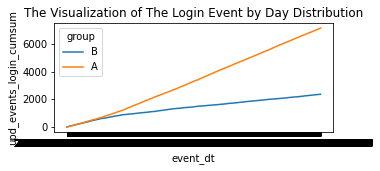

In [703]:
plt.figure(figsize=(5,2))
sns.lineplot(data=super_dataevent_cumulative, x='event_dt', y='upd_events_login_cumsum', hue='group')
plt.title('The Visualization of The Login Event by Day Distribution');

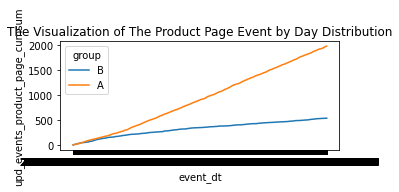

In [704]:
plt.figure(figsize=(5,2))
sns.lineplot(data=super_dataevent_cumulative, x='event_dt', y='upd_events_product_page_cumsum', hue='group')
plt.title('The Visualization of The Product Page Event by Day Distribution');

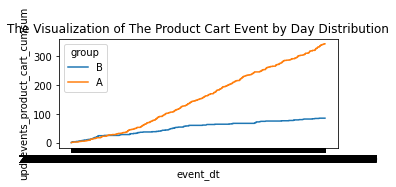

In [705]:
plt.figure(figsize=(5,2))
sns.lineplot(data=super_dataevent_cumulative, x='event_dt', y='upd_events_product_cart_cumsum', hue='group')
plt.title('The Visualization of The Product Cart Event by Day Distribution');

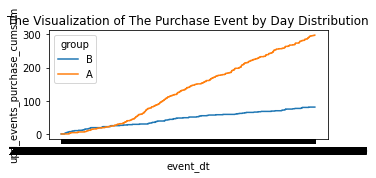

In [706]:
plt.figure(figsize=(5,2))
sns.lineplot(data=super_dataevent_cumulative, x='event_dt', y='upd_events_purchase_cumsum', hue='group')
plt.title('The Visualization of The Purchase Event by Day Distribution');

    Findings:
    
    - At the beginning of December 2020, Group A and B were in almost the same position. Different from the mid of December 2020, Group A preside till the end of the test.
    - Group A generates more events than group B. This might because the number of users in Group A is far higher than in Group B (2330 users versus 834 users).
    
    
    Prediction:
    - We could predict that the hypothesis test in Group B has no effect in increasing events cause of there are only a few users there.

[Back to Contents](#tableofcontents)

### Learning The Possible Details in The Data that We have to take into Account before starting The A/B Test

    First, we are going to ensure the total events in each group, as follows:

In [691]:
mixall_events_agg

,event_name,total
0,upd_events_login,9506
1,upd_events_product_page,2524
2,upd_events_product_cart,429
3,upd_events_purchase,379


    Then, we will ensure the 'user_per_group_dist' table, as follows:

In [692]:
user_per_group_dist

group,A,B,total,%A,%B
log_user_alpha,2330,834,3164,0.736410,0.263590
page_user_alpha,1176,345,1521,0.773176,0.226824
cart_user_alpha,258,67,325,0.793846,0.206154
purch_user_alpha,183,48,231,0.792208,0.207792


    Findings:

    - There are no users in group B as the test group instead of is only 834 users compared to the control group A, that is 2330 users.
    - There are no events in group B as the test group instead of is only 2364 events compared to the control group A, that is 7142 users.


    Prediction:
    - We could predict that the hypothesis test in group B has no effect on the increasing events cause of there are only a few users/events there.

[Back to Contents](#tableofcontents)

## Evaluation The A/B Test Results
    - Step 3. Evaluating The A/B Test Results of The Project

<div style="border:solid black 2px; padding: 20px">
    
    In this stage, we will evaluate the A/B test results with a few things to focus on:
    
    a. Several Things that We Get about The A/B Test Results
    b. The Use of Z-Criterion to Check The Statistical Difference between The Proportions
    
</div>

### By Using The Significance Level / "Alpha" Value = 0.01

    First, we will check the 'user_per_group_dist' table, as follows:

In [693]:
user_per_group_dist

group,A,B,total,%A,%B
log_user_alpha,2330,834,3164,0.736410,0.263590
page_user_alpha,1176,345,1521,0.773176,0.226824
cart_user_alpha,258,67,325,0.793846,0.206154
purch_user_alpha,183,48,231,0.792208,0.207792


    Then, check for 'total_user_per_group_oke' table, as follows:

In [694]:
total_user_per_group_oke

,total_users
A,2330
B,834


# Hypothesis Testing Formulation Part 1
    The stated Hypothesis formula in several things, as follows:
    
    - The significance level / "alpha" value to be used = 0.01
    - Using the Z-Criterion Statistics approach
    - Ho = The proportion among group samples was statistically the same (=)
    - H1 = The proportion among group samples was statistically significant not the same (/=)

    Now, we will define a formula for check the significant statistically difference among group samples, as follows:

In [695]:
def check_hypothesis_kuy(successes1, successes2, trials1, trials2, alpha=0.01):
    
    p1 = successes1/trials1

    p2 = successes2/trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = stats.norm(0, 1)

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject the null hypothesis: there is a significant difference among the shares")
    else:
        print("Failed to reject the null hypothesis, there is no reason to consider the shares different")

    Then, we define a formula for check the significant statistically difference among event in each group samples, as follows:

In [696]:
def check_event_hypothesis_kuy(user_per_group_dist, total_user_per_group_oke, event_name, exp1, exp2):
    frac1 = user_per_group_dist.loc[event_name, exp1] / total_user_per_group_oke.loc[exp1]
    frac2 = user_per_group_dist.loc[event_name, exp2] / total_user_per_group_oke.loc[exp2]
    print (f'{frac1} event {event_name} group {exp1}')
    print (f'{frac2} event {event_name} group {exp2}')
    check_hypothesis_kuy(user_per_group_dist.loc[event_name, exp1],
                     user_per_group_dist.loc[event_name, exp2],
                     total_user_per_group_oke.loc[exp1],
                     total_user_per_group_oke.loc[exp2],
                    )

    Next, we calculate the significant statistically difference among event in each group samples, as follows:

In [697]:
for event_name in user_per_group_dist.index:
    check_event_hypothesis_kuy(user_per_group_dist, total_user_per_group_oke,
                           event_name, 'A', 'B')
    print()

total_users    1.0
Name: A, dtype: float64 event log_user_alpha group A
total_users    1.0
Name: B, dtype: float64 event log_user_alpha group B
p-value:  [nan]
Failed to reject the null hypothesis, there is no reason to consider the shares different

total_users    0.504721
Name: A, dtype: float64 event page_user_alpha group A
total_users    0.413669
Name: B, dtype: float64 event page_user_alpha group B
p-value:  [6.2922157e-06]
Reject the null hypothesis: there is a significant difference among the shares

total_users    0.11073
Name: A, dtype: float64 event cart_user_alpha group A
total_users    0.080336
Name: B, dtype: float64 event cart_user_alpha group B
p-value:  [0.01309844]
Failed to reject the null hypothesis, there is no reason to consider the shares different

total_users    0.078541
Name: A, dtype: float64 event purch_user_alpha group A
total_users    0.057554
Name: B, dtype: float64 event purch_user_alpha group B
p-value:  [0.04558298]
Failed to reject the null hypothesis,

    Findings:

    - According to the hypothesis testing above, with the significance level / "alpha" value to be used = 0.01, the result is failed to reject the null hypothesis. It means that there is no significant statistically shares difference among group samples A and B, except for the event of 'product_page'.

[Back to Contents](#tableofcontents)

### By Using The Significance Level / "Alpha" Value = 0.05

# Hypothesis Testing Formulation Part 2
    The stated Hypothesis formula in several things, as follows:
    
    - The significance level / "alpha" value to be used = 0.05
    - Using the Z-Criterion Statistics approach
    - Ho = The proportion among group samples was statistically the same (=)
    - H1 = The proportion among group samples was statistically significant not the same (/=)

    First, we will define a formula for check the significant statistically difference among group samples, as follows:

In [698]:
def check_hypothesis_kuy(successes1, successes2, trials1, trials2, alpha=0.05):
    
    p1 = successes1/trials1

    p2 = successes2/trials2

    p_combined = (successes1 + successes2) / (trials1 + trials2)

    difference = p1 - p2

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    distr = stats.norm(0, 1)

    z_value = difference / math.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Reject the null hypothesis: there is a significant difference among the shares")
    else:
        print("Failed to reject the null hypothesis, there is no reason to consider the shares different")

    Then, we will define a formula for check the significant statistically difference among event in each group samples, as follows:

In [699]:
def check_event_hypothesis_kuy(user_per_group_dist, total_user_per_group_oke, event_name, exp1, exp2):
    frac1 = user_per_group_dist.loc[event_name, exp1] / total_user_per_group_oke.loc[exp1]
    frac2 = user_per_group_dist.loc[event_name, exp2] / total_user_per_group_oke.loc[exp2]
    print (f'{frac1} event {event_name} group {exp1}')
    print (f'{frac2} event {event_name} group {exp2}')
    check_hypothesis_kuy(user_per_group_dist.loc[event_name, exp1],
                     user_per_group_dist.loc[event_name, exp2],
                     total_user_per_group_oke.loc[exp1],
                     total_user_per_group_oke.loc[exp2],
                    )

    Next, we calculate the significant statistically difference among event in each group samples, as follows:

In [700]:
for event_name in user_per_group_dist.index:
    check_event_hypothesis_kuy(user_per_group_dist, total_user_per_group_oke,
                           event_name, 'A', 'B')
    print()

total_users    1.0
Name: A, dtype: float64 event log_user_alpha group A
total_users    1.0
Name: B, dtype: float64 event log_user_alpha group B
p-value:  [nan]
Failed to reject the null hypothesis, there is no reason to consider the shares different

total_users    0.504721
Name: A, dtype: float64 event page_user_alpha group A
total_users    0.413669
Name: B, dtype: float64 event page_user_alpha group B
p-value:  [6.2922157e-06]
Reject the null hypothesis: there is a significant difference among the shares

total_users    0.11073
Name: A, dtype: float64 event cart_user_alpha group A
total_users    0.080336
Name: B, dtype: float64 event cart_user_alpha group B
p-value:  [0.01309844]
Reject the null hypothesis: there is a significant difference among the shares

total_users    0.078541
Name: A, dtype: float64 event purch_user_alpha group A
total_users    0.057554
Name: B, dtype: float64 event purch_user_alpha group B
p-value:  [0.04558298]
Reject the null hypothesis: there is a significa

    Findings:

    - According to the hypothesis testing above, with the significance level / "alpha" value to be used = 0.05, the results is reject the null hypothesis. It means that there is a significant difference among the shares of group samples A and B, except for the event of 'login'.

[Back to Contents](#tableofcontents)

## Presentation
    - Step 4. Presenting My Project to The Clients

<div style="border:solid black 2px; padding: 20px">
    
    This is my presentation of 'An International Online Store Analytical Project by Using The A/B Testing' project by me, awrb.

</div>

Link Presentation: https://drive.google.com/file/d/1tc2-HAUZG1hGoUHZdMOE-19aEZuWP1RJ/view?usp=sharing

[Back to Contents](#tableofcontents)

## General Conclusions and Recommendations
    - Step 4. Formulating General Conclusions and Recommendations for Working with Clients

<div style="border:solid black 2px; padding: 20px">
    
# For Data Pre-processing

    1. Transforming the DataFrames and Converting The Data Types
    Findings:
    - We have four datasets, namely 'events_marketing', 'upd_users', 'upd_events', and 'upd_participants'.

    For 'events_marketing' dataset:
    - The dataset amounted 14 rows and 4 columns.
    - With data detailed, dtypes: object(4).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 576.0+ bytes.
    - In addition, for the dataset structures contain of the name of the marketing event, the regions where the ad campaign will be held, campaign start date, and campaign end date.

    For 'upd_users' dataset:
    - The dataset amounted 58703 rows and 4 columns.
    - With data detailed, dtypes: datetime64[ns](1), object(3).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 1.8+ MB.
    - In addition, for the dataset structures contain of customers profile of user_id, sign-up date, region, and device used to sign up.

    For 'upd_events' dataset:
    - The dataset amounted 423761 rows and 4 columns.
    - With data detailed, dtypes: float64(1), object(3).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 12.9+ MB.
    - In addition, for the dataset structures contain of user_id, event date and time, event type name, and the additional data on the event (for instance, the order total in USD for purchase events).

    For 'upd_participants' dataset:
    - The dataset amounted 14525 rows and 3 columns.
    - With data detailed, dtypes: object(3).
    - The capitalization of the columns names title are already appropriate, ie all in consists of lowercase letters.
    - Datasets memory usage: 340.6+ KB.
    - In addition, for the dataset structures contain of the list of the test group the user belonged to, those are user_id, test name, and the test group the user belonged to its self.
    
    
    2. Data Overview Elaboration
    Findings:
    - In the results above, we find that these data are in the form of object(4) from 'events_marketing' dataset, datetime64[ns](1), object(3) from 'upd_users' dataset, float64(1), object(3) from 'upd_events' dataset, and object(3) from 'upd_participants' dataset.
    - In the result of '.head()' function, four datasets display that all of this datas are 'variant' in the form of string and numbers. The numbers form are consisting of integers, decimal numbers, datetime, also sometimes mixed with letters.
    
    3. Ensuring the Data Quality
    Findings:
    - After we ensure for 'upd_users' dataset, we find that there are users who sign up on the dates of 21-23 December 2020 while for this testing, the date company stopped taking up new users is 2020-12-21. Therefore, in the EDA stage, we will pull out them after merge all DataFrames into a DataFrame.
    
    - We have checked the Data Quality of dataset columns.
    - As we could see on the 'group' column above, consist of:
    a. Group A: 8214 participants (control group)
    b. Group B: 6311 participants (new payment funnel group) => which surpass our expected number of test participants: that is stated 6000 at technical description.

    - From ensuring the data quality of the 'ab_test' column above, there are two type of 'ab_test', those are 'interface_eu_test' and 'recommender_system_test'. Cause of our purpose of this A/B testing analysis is for 'recommender_system_test' experiment (as stated at the technical description from our predecessor). Hence, we will remove the 'interface_eu_test' in the next session.
    
    4. Removing One of The 'ab_test' Types
    Findings:
    - We have removed the 'interface_eu_test' type of 'ab_test' from 'upd_participants' dataset. Now, we are going to focus on 'recommender_system_test' test name as stated by our predecessor at the technical description in advance.
    - We have ensured the 'upd_participants_remover' by using '.head()' and '.tail()' function and the result shows that 'ab_test' is almost 'recommender_system_test' and we could be sure that those are all in 'recommender_system_test' in this time.
    - As stated previously on technical description, the expected number of test participants is 6000. Nevertheless, in our data above, the 'recommender_system_test' test participants is only 3675 users.
    
    5. Ensuring Data Anomalies
    Findings:
    - From our ensuring, there are no anomalies data. The 'event_dt' column (customer's event date and time) as same as the 'first_date' column (customer's sign-up date). We have already ensure by using 'more than' (>) and 'less than (<) function.
    - The datas is already appropriate.
    
    6. Ensuring for Data Type, Array Form, Missing Values, and Duplicate Data
    Findings:
    - We have ensured for Data Type, Array Form, Missing Values, and Duplicate Data for four datasets.
    - The Data Type is already mentioned above, consist of object(4) from 'events_marketing' dataset, datetime64[ns](1), object(3) from 'upd_users' dataset, float64(1), object(3) from 'upd_events' dataset, and object(3) from 'upd_participants' dataset.

    - 1) The Array Form is (14, 4), that means 14 rows and 4 columns as well for 'events_marketing' dataset.
    - 2) The Array Form is (58703, 4), that means 58703 rows and 4 columns as well for 'upd_users' dataset.
    - 3) The Array Form is (423761, 4), that means 423761 rows and 4 columns as well for 'upd_events' dataset.
    - 4) The Array Form is (14525, 3), that means 14525 rows and 3 columns as well for 'upd_participants' dataset.

    - From our ensuring above, we found missing value at 'details' column from 'upd_events' dataset, those are 363447 rows (86.0% in the percentage of the whole 'upd_events' dataset).
    - We could see and predict that the 'details' column comprises the additional data on the event, i.e. it could be one the value of the order total for events purchases.
    - We found 'NaN' in the 'details' column which we could guess that it is on a par of there are no additional datas. Therefore, we could replace the values with the null values in the next session below.

    - There are no Duplicate Data on four datasets.
    
    7. Correcting The Missing Values and Duplicate Data
    Findings:
    - Beforehand, we found 363447 rows of Missing Values in the 'details' column from 'upd_events' dataset, that means 86.0% in the percentage calculation from the whole 'upd_events' dataset.
    - Now, we have done in removing all missing values. There are no missing value anymore.
    - The four datasets are ready to be analyzed and processed.

</div>

<div style="border:solid black 2px; padding: 20px">
    
# For Explorative Data Analysis (EDA)
    
    1. Learning Conversion at Different Funnel Stages
    Findings:
    - We could predict that the funnel stream down as follows: 'login' => 'product_page' => 'purchase' => 'product_cart'.
    - From the table above, total events in purchase is higher than product_cart ('purchase' is 2789 and 'product_cart' is 2787) 
    - To get over it, the come up approach is Closed Funnel, so it could shows sequential stream down funnels in one period. The funnels are not counted if they do not start from the first page (in 'login' event).

    a. Closed Funnel Approach
    Temporary Findings:
    At this moment, we have four new DataFrames, those are:
    1. 'upd_events_login'
    2. 'upd_events_product_page'
    3. 'upd_events_product_cart'
    4. 'upd_events_purchase'

    Temporary Findings:
    - We have already merged each table to new table.

    b. Total Events of Funnel
    Temporary Findings:
    - By using Closed Funnel approach, we could notice that from 9506 events of 'login', only 2524 that continue to the 'product_page' ('upd_events_product_page'), 429 events continue to the 'product_cart' ('upd_events_product_cart') and 379 events completed until the 'purchase' ('upd_events_purchase') stage.

    c. Total Users of Funnel
    Findings:
    - We have 3164 users who has performed on event of 'login', with details as follows:

    a. 1521 users has performed on event of 'product_page' ('upd_events_product_page').
    b. 325 users has performed on event of 'product_cart' ('upd_events_product_cart').
    c. 231 users has performed on event of 'purchase' (upd_events_purchase').

    - The percentage of users who make the entire journey from the first event till checkout stage is 7.3% (3164 users versus 231 users).
    
    2. Learning Whether The Number of Events Per User Distributed Equally in The Samples
    Findings:
    - The distribution average of events per user is 77.3% in Group A and 22.6% in Group B which distributed prevalently in each event.
    
    3. Learning Whether The Users who Enter Both Samples
    Findings:
    - There are no dual users in either sample.
    - From the table result above, the total of Group A ('group_a') is 2330 users, and the total of Group B ('group_b') is 834 users. It is equal to 3164 users in 'user_id' column ('log_user_alpha' column).
    
    4. Learning How Is The Number of Events Distributed by Days
    Findings:
    - At the beginning of December 2020, Group A and B were in almost the same position. Different from the mid of December 2020, Group A preside till the end of the test.
    - Group A generates more events than group B. This might because the number of users in Group A is far higher than in Group B (2330 users versus 834 users).

    Prediction:
    - We could predict that the hypothesis test in Group B has no effect in increasing events cause of there are only a few users there.
    
    5. Learning The Possible Details in The Data that We have to take into Account before starting The A/B Test
    Findings:
    - There are no users in group B as the test group instead of is only 834 users compared to the control group A, that is 2330 users.
    - There are no events in group B as the test group instead of is only 2364 events compared to the control group A, that is 7142 users.

    Prediction:
    - We could predict that the hypothesis test in group B has no effect on the increasing events cause of there are only a few users/events there.
    
</div>

<div style="border:solid black 2px; padding: 20px">
    
# For Evaluation The A/B Test Results
    
    The stated Hypothesis formula in several things, as follows:
    - The significance level / "alpha" value to be used = 0.01 and 0.05
    - Using the Z-Criterion Statistics approach
    - Ho = The proportion among group samples was statistically the same (=)
    - H1 = The proportion among group samples was statistically significant not the same (/=)

    1. By Using The Significance Level / "Alpha" Value = 0.01
    Findings:
    - According to the hypothesis testing above, with the significance level / "alpha" value to be used = 0.01, the result is failed to reject the null hypothesis. It means that there is no significant statistically shares difference among group samples A and B, except for the event of 'product_page'.

    2. By Using The Significance Level / "Alpha" Value = 0.05
    Findings:
    - According to the hypothesis testing above, with the significance level / "alpha" value to be used = 0.05, the results is reject the null hypothesis. It means that there is a significant difference among the shares of group samples A and B, except for the event of 'login'.
    
</div>

<div style="border:solid black 2px; padding: 20px">

# Presentation

    Link Presentation: https://drive.google.com/file/d/1tc2-HAUZG1hGoUHZdMOE-19aEZuWP1RJ/view?usp=sharing
    
</div>

<div style="border:solid black 2px; padding: 20px">
    
# Recommendations
    
    - The difference of the A/B testing results for statistical differences among the proportions using Z-Criterion "alpha" value = 0.01 (failed to reject the null hypothesis) and "alpha" value = 0.05 (reject the null hypothesis). It means that there is a possibility of a significant difference between the shares of group samples A and B. Instead of the decreasing alpha from 0.05 to 0.01 makes it harder to reject the null hypothesis.
    
    - According to the data above, we could predict that the hypothesis test in group B has no effect in the increasing events cause of there are only a few users in group B there.
    
    - It will preferable for we recommend increasing the size of the population under observation and longer trial days for more convincing A/B test results.
    
</div>

[Back to Contents](#tableofcontents)